# DBSCAN Model

### Import packages and data

In [25]:
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
import warnings
warnings.simplefilter("ignore")
import scipy.cluster.hierarchy as shc
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

from sklearn import manifold
from sklearn.decomposition import PCA

data = pd.read_pickle("cleaned_data.pkl")

### Gower Distance

In [2]:
def gower_distance(X):
    
    #Nominal variables: Dice distance (https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
    #Numeric variables: Manhattan distance normalized by the range of the variable (https://en.wikipedia.org/wiki/Taxicab_geometry)
    
    individual_variable_distances = []

    for i in range(X.shape[1]):
        feature = X.iloc[:,[i]]
        if feature.dtypes[0] == np.object:
            feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature))
        else:
            feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / np.ptp(feature.values)

        individual_variable_distances.append(feature_dist)

    return np.array(individual_variable_distances).mean(0)

In [6]:
# Rename data to X
X=data

In [8]:
# Store the output of function gower_distance for X as dist 
dist=gower_distance(X)

In [9]:
dist.shape

(44, 44)

In [10]:
data.shape

(44, 8)

In [11]:
dist1=pd.DataFrame(dist)

In [12]:
dist1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.375000,0.500000,0.375000,0.522204,0.397204,0.539720,0.530674,0.424753,0.549753,...,0.880263,0.755263,0.755263,0.505263,0.630263,0.880263,0.761842,0.810609,0.560609,0.787500
1,0.375000,0.000000,0.500000,0.500000,0.397204,0.397204,0.664720,0.655674,0.549753,0.549753,...,0.880263,0.630263,0.880263,0.755263,0.880263,0.880263,0.761842,0.810609,0.685609,0.787500
2,0.500000,0.500000,0.000000,0.375000,0.272204,0.522204,0.664720,0.530674,0.674753,0.424753,...,0.630263,0.755263,0.755263,0.880263,0.755263,0.755263,0.886842,0.685609,0.810609,0.537500
3,0.375000,0.500000,0.375000,NaN,0.397204,0.522204,0.539720,0.655674,0.549753,0.674753,...,0.755263,0.880263,0.630263,0.755263,0.630263,0.880263,0.761842,0.810609,0.810609,0.787500
4,0.522204,0.397204,0.272204,0.397204,0.000000,0.500000,0.642516,0.517845,0.683799,0.558799,...,0.608059,0.733059,0.733059,0.858059,0.733059,0.733059,0.739638,0.663405,0.788405,0.671546


In [14]:
data.isnull().values.any(axis=0)

array([False, False, False,  True,  True, False, False, False])

In [15]:
dist1=dist1.fillna(0)

In [16]:
dist1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.375000,0.500000,0.375000,0.522204,0.397204,0.539720,0.530674,0.424753,0.549753,...,0.880263,0.755263,0.755263,0.505263,0.630263,0.880263,0.761842,0.810609,0.560609,0.787500
1,0.375000,0.000000,0.500000,0.500000,0.397204,0.397204,0.664720,0.655674,0.549753,0.549753,...,0.880263,0.630263,0.880263,0.755263,0.880263,0.880263,0.761842,0.810609,0.685609,0.787500
2,0.500000,0.500000,0.000000,0.375000,0.272204,0.522204,0.664720,0.530674,0.674753,0.424753,...,0.630263,0.755263,0.755263,0.880263,0.755263,0.755263,0.886842,0.685609,0.810609,0.537500
3,0.375000,0.500000,0.375000,0.000000,0.397204,0.522204,0.539720,0.655674,0.549753,0.674753,...,0.755263,0.880263,0.630263,0.755263,0.630263,0.880263,0.761842,0.810609,0.810609,0.787500
4,0.522204,0.397204,0.272204,0.397204,0.000000,0.500000,0.642516,0.517845,0.683799,0.558799,...,0.608059,0.733059,0.733059,0.858059,0.733059,0.733059,0.739638,0.663405,0.788405,0.671546


In [19]:
dbscan = DBSCAN(eps=0.4, min_samples=1, metric="precomputed", n_jobs=-1)

In [20]:
db=dbscan.fit(dist1.values)

In [21]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0,
       0, 0, 1, 0, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 8])

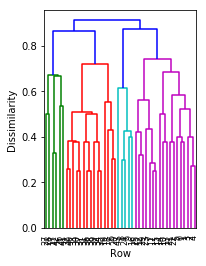

<Figure size 72x72 with 0 Axes>

In [32]:
dissimilarity = distance.squareform(dist1.values)
linkage = hierarchy.linkage(dissimilarity, method="complete")
clusters = hierarchy.fcluster(linkage, 0.8, criterion="distance") # change to decide where the colors begin to differentiate(must do both)
plt.subplot(122)
hierarchy.dendrogram(linkage, color_threshold=0.8) # change to decide where the colors begin to differentiate(must do both)
plt.xlabel("Row")
plt.ylabel("Dissimilarity")
plt.figure(figsize=(1,1))
plt.show()

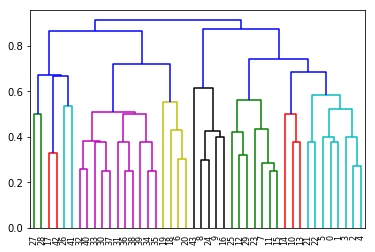

In [33]:
dend = shc.dendrogram(linkage)